In [1]:
import os
os.chdir("D:\Abhinav Tar Files\Snapshots")


Processed 20/802 snapshots (019)
Processed 40/802 snapshots (039)
Processed 60/802 snapshots (059)
Processed 80/802 snapshots (079)
Processed 100/802 snapshots (099)
Processed 120/802 snapshots (119)
Processed 140/802 snapshots (139)
Processed 160/802 snapshots (159)
Processed 180/802 snapshots (179)
Processed 200/802 snapshots (199)
Processed 220/802 snapshots (219)
Processed 240/802 snapshots (239)
Processed 260/802 snapshots (259)
Processed 280/802 snapshots (279)
Processed 300/802 snapshots (299)
Processed 320/802 snapshots (319)
Processed 340/802 snapshots (339)
Processed 360/802 snapshots (359)
Processed 380/802 snapshots (379)
Processed 400/802 snapshots (399)
Processed 420/802 snapshots (419)
Processed 440/802 snapshots (439)
Processed 460/802 snapshots (459)
Processed 480/802 snapshots (479)
Processed 500/802 snapshots (499)
Processed 520/802 snapshots (519)
Processed 540/802 snapshots (539)
Processed 560/802 snapshots (559)
Processed 580/802 snapshots (579)
Processed 600/802 

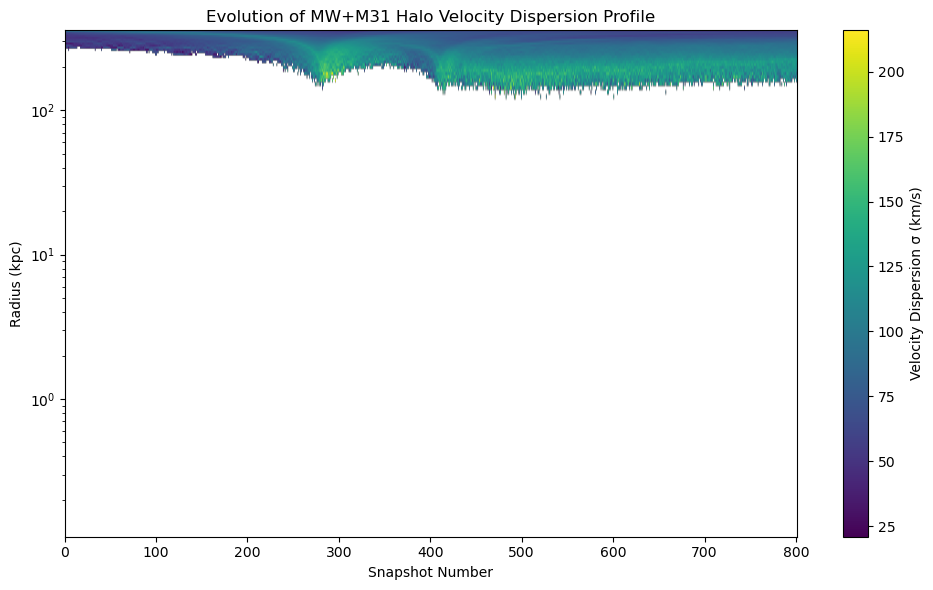

In [3]:
# MW+M31 Halo Velocity Dispersion Evolution
import numpy as np
import matplotlib.pyplot as plt
from CenterOfMass2 import CenterOfMass

def velocity_dispersion_profile(x, y, z, vx, vy, vz, r_bins):
    r = np.sqrt(x**2 + y**2 + z**2)
    sigma_profile = np.zeros(len(r_bins)-1)
    for i in range(len(r_bins)-1):
        mask = (r >= r_bins[i]) & (r < r_bins[i+1])
        if np.sum(mask) > 5:
            vr = np.sqrt(vx[mask]**2 + vy[mask]**2 + vz[mask]**2)
            sigma_profile[i] = np.std(vr)
        else:
            sigma_profile[i] = np.nan
    return sigma_profile

snapshots = np.arange(0, 802)
r_bins = np.logspace(-1, 2.6, 40)
r_mid = np.sqrt(r_bins[:-1]*r_bins[1:])
sigma_matrix = np.zeros((len(snapshots), len(r_mid)))

total_snaps = len(snapshots)
processed = 0

for idx, snap in enumerate(snapshots):
    mw_file = f"MW_{snap:03d}.txt"
    m31_file = f"M31_{snap:03d}.txt"
    
    MW = CenterOfMass(mw_file, 1)
    M31 = CenterOfMass(m31_file, 1)
    
    x = np.concatenate((MW.x, M31.x))
    y = np.concatenate((MW.y, M31.y))
    z = np.concatenate((MW.z, M31.z))
    vx = np.concatenate((MW.vx, M31.vx))
    vy = np.concatenate((MW.vy, M31.vy))
    vz = np.concatenate((MW.vz, M31.vz))
    m = np.concatenate((MW.m, M31.m))
    
    xcom, ycom, zcom = MW.COMdefine(x, y, z, m)
    x -= xcom
    y -= ycom
    z -= zcom
    
    sigma_matrix[idx] = velocity_dispersion_profile(x, y, z, vx, vy, vz, r_bins)
    
    processed += 1
    if processed % 20 == 0 or processed == total_snaps:
        print(f"Processed {processed}/{total_snaps} snapshots ({snap:03d})")

plt.figure(figsize=(10,6))
plt.imshow(sigma_matrix.T, aspect='auto', origin='lower',
           extent=[snapshots[0], snapshots[-1], r_mid[0], r_mid[-1]],
           cmap='viridis')
plt.colorbar(label='Velocity Dispersion σ (km/s)')
plt.yscale('log')
plt.xlabel("Snapshot Number")
plt.ylabel("Radius (kpc)")
plt.title("Evolution of MW+M31 Halo Velocity Dispersion Profile")
plt.tight_layout()
plt.savefig("velocity_dispersion_evolution.png", dpi=300)
plt.show()
